### UE213020 EXERCISE 7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Performing exercise 6 using Pandas

data=pd.read_csv(r'retail.csv')

In [2]:
data = pd.read_csv('OnlineRetail.csv')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


##### Find mean, std dev, min , max of unitprice field.

In [4]:
mean=data['UnitPrice'].mean()
standard_deviation=data['UnitPrice'].std()
minimum=data['UnitPrice'].min()
maximum=data['UnitPrice'].max()

print("mean",mean)
print("Standard deviation",standard_deviation)
print("Minimum",minimum)
print("Maximum",maximum)


mean 4.611113626088513
Standard deviation 96.75985306117938
Minimum -11062.06
Maximum 38970.0


##### Draw histogram of unitprice field using matplotlib

<Axes: ylabel='Frequency'>

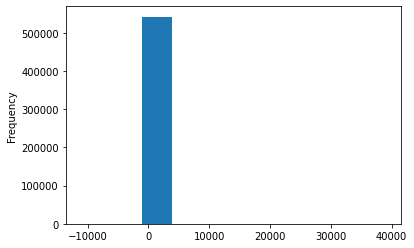

In [5]:
data['UnitPrice'].plot.hist(bins=10)

#####  Find mean of unitprice group by country and plot them

In [6]:
grouped_by_country=data.groupby('Country').agg({'UnitPrice':['mean']})

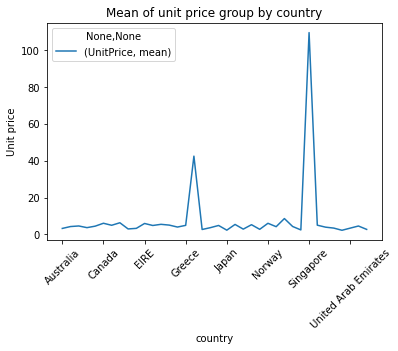

In [7]:
grouped_by_country.plot(xlabel="country",ylabel="Unit price",title="Mean of unit price group by country")
plt.xticks(rotation=45)
plt.show()

##### Find min and max of unit price group by customerID

In [8]:
data.groupby('CustomerID').agg({'UnitPrice':[min,max]})

C:\Users\Aryan Singh Dhiman\AppData\Local\Temp\ipykernel_7068\90539203.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.groupby('CustomerID').agg({'UnitPrice':[min,max]})
C:\Users\Aryan Singh Dhiman\AppData\Local\Temp\ipykernel_7068\90539203.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.groupby('CustomerID').agg({'UnitPrice':[min,max]})


UnitPrice        
                 min     max
CustomerID                  
12346.0         1.04    1.04
12347.0         0.25   12.75
12348.0         0.29   40.00
12349.0         0.42  300.00
12350.0         0.85   40.00
...              ...     ...
18280.0         2.55    9.95
18281.0         0.42   16.95
18282.0         0.29   12.75
18283.0         0.29   15.95
18287.0         0.29    8.50

[4372 rows x 2 columns]

###### Find cumulative sales monthly and yearly and plot them

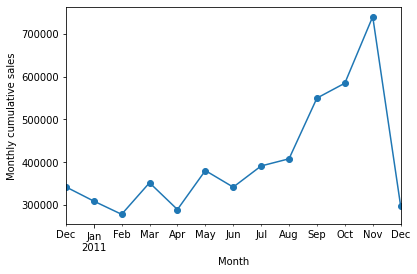

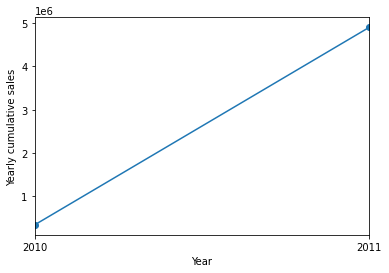

In [9]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['Year'] = data['InvoiceDate'].dt.to_period('Y')

data['CumulativeSales'] = data.groupby('Month')['Quantity'].transform('cumsum')
data['CumulativeSalesYearly'] = data.groupby('Year')['Quantity'].transform('cumsum')
data.groupby('Month')['CumulativeSales'].max().plot(kind='line', marker='o',ylabel="Monthly cumulative sales")
plt.show()
data.groupby('Year')['CumulativeSalesYearly'].max().plot(kind='line', marker='o',ylabel="Yearly cumulative sales")
plt.show()

### Questions on NIRF dataset

##### 1. Read NIRF data as given

In [10]:
nirf=pd.read_csv(r"nirf.csv")

In [11]:
nirf

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,IR-E-C-42227,Dr. D. Y. Patil Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.69,1.66,53.63,48.50,1.63,Pune,Maharashtra,31.15,196
196,IR-E-C-49660,Pimpri Chinchwad College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,46.11,7.36,50.73,48.76,0.55,Pune,Maharashtra,31.13,197
197,IR-E-C-34167,Ramrao Adik Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.60,3.82,45.75,47.25,0.00,Navi Mumbai,Maharashtra,31.11,198
198,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.10,199


##### 2. Group the data statewise and Count the number of colleges in each state.

In [12]:
nirf.groupby('state')['institute_id'].count()

state
Andhra Pradesh       10
Arunachal Pradesh     2
Assam                 3
Bihar                 2
Chandigarh            2
Chhattisgarh          1
Delhi                 7
Goa                   1
Gujarat               7
Haryana               6
Himachal Pradesh      4
Jammu and Kashmir     1
Jharkhand             4
Karnataka            21
Kerala                5
Madhya Pradesh        5
Maharashtra          22
Manipur               1
Meghalaya             1
Odisha                7
Pondicherry           2
Punjab                8
Rajasthan             4
Tamil Nadu           35
Telangana            15
Tripura               1
Uttar Pradesh        11
Uttarakhand           4
West Bengal           8
Name: institute_id, dtype: int64

##### 3. Sort the records based on rpc attribute (Research Professional practices).

In [13]:
nirf.sort_values(by='rpc')

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
198,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.10,199
146,IR-E-C-1345,P E S College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,59.25,0.71,51.11,54.45,0.00,Mandya,Karnataka,33.65,147
186,IR-E-C-26162,Vasavi College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,48.80,0.75,56.58,50.47,2.16,Hyderabad,Telangana,31.46,187
185,IR-E-C-1398,BNM Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,55.66,1.11,46.87,50.80,0.00,Bengaluru,Karnataka,31.48,186
189,IR-E-C-26905,G.Pulla Reddy Engineering College,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.11,1.15,48.27,51.60,2.69,Kurnool,Andhra Pradesh,31.35,190
...,...,...,...,...,...,...,...,...,...,...,...,...
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1


##### 4. Find the rank of Panjab University as per rpc attribute

In [14]:
rpc_panjab_uni=nirf[nirf['name']=="Panjab University"]['rpc'].values[0]
print(rpc_panjab_uni)
rank=nirf[nirf['rpc']>rpc_panjab_uni]['institute_id'].count()
print("rank of panjab university according to rpc attribute ",rank+1)

43.55
rank of panjab university according to rpc attribute  26


###### 5. List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [15]:
rank_pu=nirf[nirf['name']=="Panjab University"]['rank'].values[0]
print("rpc value of PU ",rpc_panjab_uni)
print("Rank of PU ",rank_pu)
colleges=nirf[(nirf["rpc"]<rpc_panjab_uni) & (nirf['rank']<rank_pu)]
colleges[['name','rpc','rank']].sort_values(by='rank')

rpc value of PU  43.55
Rank of PU  72


,name,rpc,rank
18,National Institute of Technology Warangal,38.12,19
21,Indian Institute of Technology Bhubaneswar,37.17,22
22,National Institute of Technology Calicut,31.30,23
23,Indian Institute of Technology Gandhinagar,34.55,24
24,Indian Institute of Technology Ropar,30.54,25
25,Indian Institute of Technology Patna,39.24,26
29,Birla Institute of Technology & Science,34.87,30
30,Indian Institute of Technology Mandi,36.80,31
32,Indian Institute of Space Science and Technology,24.02,33
33,Siksha `O` Anusandhan,29.41,34


##### 6. Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

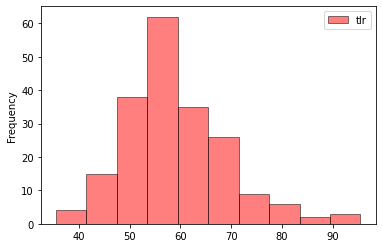

In [16]:
nirf.plot.hist(y='tlr',bins=10,alpha=0.5,color="red",edgecolor="black")
plt.show()